<a href="https://colab.research.google.com/github/SBU-COSMOLIKE/CoCoAGoogleColabExamples/blob/main/Cocoa_Example_(LSSTY1)_Sampler_Comparison_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive (optional, does not work with local runtime)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installation

## Install Miniforge

In [ ]:
%%bash
export CONDA_DIR="/content/conda"
mkdir "${CONDA_DIR:?}"
curl -L -O "https://github.com/conda-forge/miniforge/releases/latest/download/Miniforge3-$(uname)-$(uname -m).sh"
/bin/bash Miniforge3-$(uname)-$(uname -m).sh -f -b -p "${CONDA_DIR:?}"
/bin/bash
source $CONDA_DIR/etc/profile.d/conda.sh \
      && conda config --set auto_update_conda false \
      && conda config --set show_channel_urls true \
      && conda config --set auto_activate_base false \
      && conda config --prepend channels conda-forge \
      && conda config --add allowlist_channels conda-forge \
      && conda config --set channel_priority strict \
      && conda init bash
source ~/.bashrc

PREFIX=/content/conda
Unpacking payload ...
Extracting _libgcc_mutex-0.1-conda_forge.tar.bz2
Extracting ca-certificates-2025.7.14-hbd8a1cb_0.conda
Extracting ld_impl_linux-64-2.44-h1423503_1.conda
Extracting libgomp-15.1.0-h767d61c_3.conda
Extracting pybind11-abi-4-hd8ed1ab_3.tar.bz2
Extracting python_abi-3.12-8_cp312.conda
Extracting tzdata-2025b-h78e105d_0.conda
Extracting _openmp_mutex-4.5-2_gnu.tar.bz2
Extracting libgcc-15.1.0-h767d61c_3.conda
Extracting c-ares-1.34.5-hb9d3cd8_0.conda
Extracting libexpat-2.7.1-hecca717_0.conda
Extracting libffi-3.4.6-h2dba641_1.conda
Extracting libgcc-ng-15.1.0-h69a702a_3.conda
Extracting libiconv-1.18-h4ce23a2_1.conda
Extracting liblzma-5.8.1-hb9d3cd8_2.conda
Extracting libnsl-2.0.1-hb9d3cd8_1.conda
Extracting libstdcxx-15.1.0-h8f9b012_3.conda
Extracting libzlib-1.3.1-hb9d3cd8_2.conda
Extracting ncurses-6.5-h2d0b736_3.conda
Extracting openssl-3.5.1-h7b32b05_0.conda
Extracting reproc-14.2.5.post0-hb9d3cd8_0.conda
Extracting bzip2-1.0.8-h4bc722e_7.c

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 89.5M  100 89.5M    0     0  63.8M      0  0:00:01  0:00:01 --:--:-- 63.8M


## Install Cocoa conda Environment


In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda create -n lockenv -c conda-forge python=3.10 conda-lock=2.* wget --quiet --yes # Google Collab: additional arguments --quite --yes
wget https://raw.githubusercontent.com/CosmoLike/cocoa/refs/heads/dev/cocoapy310-linux.yml

Channels:
 - conda-forge
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /content/conda/envs/lockenv

  added / updated specs:
    - conda-lock=2
    - python=3.10
    - wget


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    annotated-types-0.7.0      |     pyhd8ed1ab_1          18 KB  conda-forge
    appdirs-1.4.4              |     pyhd8ed1ab_1          14 KB  conda-forge
    backports-1.0              |     pyhd8ed1ab_5           7 KB  conda-forge
    backports.tarfile-1.2.0    |     pyhd8ed1ab_1          32 KB  conda-forge
    brotli-python-1.1.0        |  py310hf71b8c6_3         343 KB  conda-forge
    ca-certificates-2025.8.3   |       hbd8a1cb_0         151 KB  conda-forge
    cachecontrol-0.14.3        |     pyha770c72_0          23 KB  conda-forge
    cachecontrol-with-filecache-0.14.3|     pyhd8ed1ab_0           7 KB  cond

--2025-08-30 03:36:07--  https://raw.githubusercontent.com/CosmoLike/cocoa/refs/heads/dev/cocoapy310-linux.yml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100985 (99K) [text/plain]
Saving to: ‘cocoapy310-linux.yml’

     0K .......... .......... .......... .......... .......... 50% 35.6M 0s
    50K .......... .......... .......... .......... ........  100% 30.2M=0.003s

2025-08-30 03:36:08 (32.7 MB/s) - ‘cocoapy310-linux.yml’ saved [100985/100985]



In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh"        # Google Colab require conda to be loaded at every cell
conda activate lockenv
conda-lock install -n cocoa cocoapy310-linux.yml

INFO:root:Transaction
INFO:root:
INFO:root:  Prefix: /content/conda/envs/cocoa
INFO:root:
INFO:root:  Updating specs:
INFO:root:
INFO:root:   - _libgcc_mutex==0.1=conda_forge
INFO:root:   - git-lfs==3.6.1=h59e48b9_0
INFO:root:   - kernel-headers_linux-64==3.10.0=he073ed8_18
INFO:root:   - libboost-headers==1.85.0=ha770c72_4
INFO:root:   - mpi==1.0=openmpi
INFO:root:   - python_abi==3.10=8_cp310
INFO:root:   - tzdata==2025b=h78e105d_0
INFO:root:   - ca-certificates==2025.1.31=hbd8a1cb_1
INFO:root:   - ld_impl_linux-64==2.43=h712a8e2_5
INFO:root:   - libgcc-devel_linux-64==13.2.0=hdb50d1a_113
INFO:root:   - libgomp==15.1.0=h767d61c_4
INFO:root:   - libstdcxx-devel_linux-64==13.2.0=hdb50d1a_113
INFO:root:   - sysroot_linux-64==2.17=h0157908_18
INFO:root:   - _openmp_mutex==4.5=2_gnu
INFO:root:   - binutils_impl_linux-64==2.43=h4bf12b8_5
INFO:root:   - binutils==2.43=h4852527_5
INFO:root:   - binutils_linux-64==2.43=h4852527_5
INFO:root:   - libgcc==15.1.0=h767d61c_4
INFO:root:   - c-ares=

In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh"        # Google Collab require conda to be loaded at every cell
conda activate cocoa                                  # Google Collab require conda to be loaded at every cell
ln -s "${CONDA_PREFIX}"/bin/x86_64-conda_cos6-linux-gnu-gcc "${CONDA_PREFIX}"/bin/gcc
ln -s "${CONDA_PREFIX}"/bin/x86_64-conda_cos6-linux-gnu-g++ "${CONDA_PREFIX}"/bin/g++
ln -s "${CONDA_PREFIX}"/bin/x86_64-conda_cos6-linux-gnu-gfortran "${CONDA_PREFIX}"/bin/gfortran
ln -s "${CONDA_PREFIX}"/bin/x86_64-conda-linux-gnu-gcc-ar "${CONDA_PREFIX}"/bin/gcc-ar
ln -s "${CONDA_PREFIX}"/bin/x86_64-conda-linux-gnu-gcc-ranlib "${CONDA_PREFIX}"/bin/gcc-ranlib
git-lfs install

Git LFS initialized.


## Clone, setup and compile Cocoa (.local) env

In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh"        # Google Colab require conda to be loaded at every cell
conda activate cocoa                                  # Google Colab require conda to be loaded at every cell
git clone https://github.com/CosmoLike/cocoa.git --branch v4.02 cocoa

Cloning into 'cocoa'...
Note: switching to '1618e9a405c27b0c71c88c06d8172d5cf2b30e72'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

Filtering content: 100% (9/9), 265.37 MiB | 28.46 MiB/s, done.


In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda activate cocoa                           # Google Colab require conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab require conda to be loaded at every cell
source setup_cocoa.sh

SETUP COCOA INSTALLATION PACKAGES 
  SETUP COCOA PRIVATE PYTHON ENV 
  SETUP COCOA PRIVATE PYTHON ENV DONE
  GETTING SPDLOG LIBRARY (CORE LIBS) 
  GETTING SPDLOG LIBRARY (CORE LIBS) DONE
  GETTING ARMA LIBRARY DONE (CORE LIBS) 
  GETTING ARMA LIBRARY DONE (CORE LIBS) DONE
  GETTING CARMA LIBRARY DONE (CORE LIBS) 
  GETTING CARMA LIBRARY DONE (CORE LIBS) DONE
  INSTALLING A FEW PYTHON CORE LIBRARIES VIA PIP 
  INSTALLING PYTHON CORE LIBRARIES VIA PIP DONE
  PIP INSTALL MACHINE LEARNING GPU PACKAGES (takes a while O(5-10min)...) 
  PIP INSTALL MACHINE LEARNING GPU PACKAGES DONE
  SETUP COBAYA 
  SETUP COBAYA DONE
  INSTALLING FGSPECTRA 
  INSTALLING FGSPECTRA DONE
  SETUP SIMONS OBSERVATORY SYSLIBRARY 
  SETUP SIMONS OBSERVATORY SYSLIBRARY DONE
  SETUP SIMONS OBSERVATORY MFLIKE 
  SETUP SIMONS OBSERVATORY MFLIKE DONE
  SETUP ACTDR4 
  SETUP ACTDR4 DONE
  SETUP ACTDR6 (CMBONLY) 
  SETUP ACTDR6 (CMBONLY) DONE
  SETUP ACTDR6 (MFLIKE) 
  SETUP ACTDR6 (MFLIKE) DONE
  SETUP POLYCHORD 
  SETUP 

CosmoRec.v2.0.3b.ta 100%[===================>]  19.81M  7.28MB/s    in 2.7s    
ACT_dr6_likelihood_ 100%[===================>] 344.57M   567KB/s    in 10m 26s 
dr6_data_cmbonly.ta 100%[===================>] 280.26K   107KB/s    in 2.6s    
dr6_data.tar.gz     100%[===================>] 394.06M   566KB/s    in 12m 11s 


In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda activate cocoa                           # Google Colab require conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab require conda to be loaded at every cell
source compile_cocoa.sh

COMPILING EXTERNAL MODULES 
  COMPILING SPDLOG CPP LIBRARY (CORE LIBS) 
  COMPILING SPDLOG CPP LIBRARY (CORE LIBS) DONE
  COMPILING ARMADILLO CPP LIBRARY (CORE LIBS) 
  COMPILING ARMADILLO CPP LIBRARY (CORE LIBS) DONE
  COMPILING CARMA CPP LIBRARY (CORE LIBS) 
  COMPILING CARMA CPP LIBRARY (CORE LIBS) DONE
  COMPILING COSMOREC RECOMBINATION CODE 
  COMPILING COSMOREC RECOMBINATION CODE DONE
  COMPILING CAMB 
  COMPILING CAMB DONE
  COMPILING PLANCK LIKELIHOOD 
  COMPILING PLANCK LIKELIHOOD DONE
  COMPILING POLYCHORD 
  COMPILING POLYCHORD DONE
  COMPILING FGSPECTRA 
  COMPILING FGSPECTRA DONE
  COMPILING SIMONS OBSERVATORY SYSLIBRARY 
  COMPILING SIMONS OBSERVATORY SYSLIBRARY DONE
  COMPILING SIMONS OBSERVATORY MKLIKE 
  COMPILING SIMONS OBSERVATORY MKLIKE DONE
  COMPILING ACT-DR4 
  COMPILING ACT-DR4 DONE
  COMPILING ACT-DR6 (CMBONLY) 
  COMPILING ACT-DR6 (CMBONLY) DONE
  COMPILING ACT-DR6 (MFLIKE) 
  COMPILING ACT-DR6 (MFLIKE) DONE
  COMPILING NAUTILUS SAMPLER 
  COMPILING NAUTILUS S

##Saving CoCoA on drive (optional, does not work with local runtime)

In [ ]:
%%bash
DEST="/content/drive/MyDrive/ColabBackups"
ARCHIVE="$DEST/colab_basic_cocoa.tar.gz"
if [[ -f "$ARCHIVE" ]]; then
  echo "Backup already exists: $ARCHIVE — skipping."
  exit 0
fi
mkdir -p "$DEST"
tar -czf "$ARCHIVE" \
  --exclude='/content/drive' \
  --exclude='**/__pycache__' \
  --exclude='**/.ipynb_checkpoints' \
  /content

echo "Created: $ARCHIVE"

Backup already exists: /content/drive/MyDrive/ColabBackups/colab_basic_cocoa.tar.gz — skipping.


#Alternative Installation: Load CoCoA from Drive (does not work with local runtime)

In [ ]:
%%bash
SENTINEL="/content/conda/etc/profile.d/conda.sh"  # exists when your env is restored
if [[ -e "$SENTINEL" ]]; then
  echo "Found $SENTINEL — environment already restored. Skipping untar."
  exit 0
fi
DEST="/content/drive/MyDrive/ColabBackups"
ARCHIVE="$DEST/colab_basic_cocoa.tar.gz"
test -f "$ARCHIVE"
tar -xzf "$ARCHIVE" -C /

tar: content/.config/gce: time stamp 2040-01-01 00:00:00 is 452464722.235097324 s in the future


# Run LCDM MCMC (Metropolis-Hasting)

In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab requires conda to be loaded at every cell
conda activate cocoa                           # Google Colab requires conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab requires conda to be loaded at every cell
source start_cocoa.sh                          # Google Colab requires (.local) to be loaded at every cell
export OMP_NUM_THREADS=1                       # Google Colab requires (.local) to be loaded at every cell

# Google Colab requires some tweaks in the mpirun command (compared to our documentation)
# (1) --bind-to core:overload-allowed
# (2) --mca btl tcp,self (instead of --mca btl vader,tcp,self)
# (3) The new option --allow-run-as-root
mpirun -n 4 --allow-run-as-root --oversubscribe --mca pml ^ucx --mca btl tcp,self \
    --bind-to core:overload-allowed --rank-by slot --map-by slot \
    cobaya-run ./projects/lsst_y1/EXAMPLE_EMUL_MCMC2.yaml -r

[0 : output] Output to be read-from/written-into folder './projects/lsst_y1/chains', with prefix 'EXAMPLE_EMUL_MCMC2'

Classy could not be found in your system.
Here are some suggestions:

	 -Download the Class from class-code.net and install it
	  together with its wrapper classy (type 'make' instead of
	  'make class'
	 -If you know that Class is installed on your system
	  and yet classy could not be installed, try re-compiling
	  Class with just ''make'' instead of ''make class''
NOTICE: Even without classy you can still use EuclidEmulator2
        to emulate boost factors. You won't be able to compute
        full power spectra, though.

Classy could not be found in your system.
Here are some suggestions:

	 -Download the Class from class-code.net and install it
	  together with its wrapper classy (type 'make' instead of
	  'make class'
	 -If you know that Class is installed on your system
	  and yet classy could not be installed, try re-compiling
	  Class with just ''make'' inste

/content/conda/envs/cocoa/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator GaussianProcessRegressor from version 1.2.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/content/conda/envs/cocoa/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator GaussianProcessRegressor from version 1.2.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/content/conda/envs/cocoa/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator GaussianProcessRegressor from v

# Checkpoint (optional, does not work with local runtime)

## Save Checkpoint

In [ ]:
%%bash
DEST="/content/drive/MyDrive/ColabBackups"
ARCHIVE="$DEST/colab_lsst_y1_sample_comparison_v2_CHK1_$(date +%F_%H-%M).tar.gz"
mkdir -p "$DEST"
tar -czf "$ARCHIVE" \
  --exclude='/content/drive' \
  --exclude='**/__pycache__' \
  --exclude='**/.ipynb_checkpoints' \
  /content
echo "Created: $ARCHIVE"

Created: /content/drive/MyDrive/ColabBackups/colab_lsst_y1_sample_comparison_v2_CHK1_2025-08-30_06-26.tar.gz


tar: Removing leading `/' from member names
tar: Removing leading `/' from hard link targets


##Load Checkpoint

In [ ]:
%%bash
SENTINEL="/content/conda/etc/profile.d/conda.sh"  # exists when your env is restored
if [[ -e "$SENTINEL" ]]; then
  echo "Found $SENTINEL — environment already restored. Skipping untar."
  exit 0
fi
DEST="/content/drive/MyDrive/ColabBackups"
ARCHIVE="$DEST/xxx"
test -f "$ARCHIVE"
tar -xzf "$ARCHIVE" -C /
echo "Loaded Checkpoint: $ARCHIVE"

# Run LCDM MCMC (Emcee)

In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab requires conda to be loaded at every cell
conda activate cocoa                           # Google Colab requires conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab requires conda to be loaded at every cell
source start_cocoa.sh                          # Google Colab requires (.local) to be loaded at every cell
export OMP_NUM_THREADS=1                       # Google Colab requires (.local) to be loaded at every cell

# Google Colab requires some tweaks in the mpirun command (compared to our documentation)
# (1) --bind-to core:overload-allowed
# (2) --mca btl tcp,self (instead of --mca btl vader,tcp,self)
# (3) The new option --allow-run-as-root
# ~12 MPIs sweet spot that made GPU utilization ~50%
mpirun -n 12 --allow-run-as-root --oversubscribe --mca pml ^ucx --mca btl tcp,self \
    --bind-to core:overload-allowed --rank-by slot --map-by slot \
    python ./projects/lsst_y1/EXAMPLE_EMUL_EMCEE2.py --root ./projects/lsst_y1/ \
      --outroot "EXAMPLE_EMUL_EMCEE2" --maxfeval 2000000


Classy could not be found in your system.
Here are some suggestions:

	 -Download the Class from class-code.net and install it
	  together with its wrapper classy (type 'make' instead of
	  'make class'
	 -If you know that Class is installed on your system
	  and yet classy could not be installed, try re-compiling
	  Class with just ''make'' instead of ''make class''
NOTICE: Even without classy you can still use EuclidEmulator2
        to emulate boost factors. You won't be able to compute
        full power spectra, though.

Classy could not be found in your system.
Here are some suggestions:

	 -Download the Class from class-code.net and install it
	  together with its wrapper classy (type 'make' instead of
	  'make class'
	 -If you know that Class is installed on your system
	  and yet classy could not be installed, try re-compiling
	  Class with just ''make'' instead of ''make class''
NOTICE: Even without classy you can still use EuclidEmulator2
        to emulate boost factors. Y

# Checkpoint (optional, does not work with local runtime)

## Save Checkpoint

In [ ]:
%%bash
DEST="/content/drive/MyDrive/ColabBackups"
ARCHIVE="$DEST/colab_lsst_y1_sample_comparison_v2_CHK2_$(date +%F_%H-%M).tar.gz"
mkdir -p "$DEST"
tar -czf "$ARCHIVE" \
  --exclude='/content/drive' \
  --exclude='**/__pycache__' \
  --exclude='**/.ipynb_checkpoints' \
  /content
echo "Created: $ARCHIVE"

Created: /content/drive/MyDrive/ColabBackups/colab_lsst_y1_sample_comparison_v2_CHK2_2025-08-30_10-34.tar.gz


tar: Removing leading `/' from member names
tar: Removing leading `/' from hard link targets


##Load Checkpoint

In [ ]:
%%bash
SENTINEL="/content/conda/etc/profile.d/conda.sh"  # exists when your env is restored
if [[ -e "$SENTINEL" ]]; then
  echo "Found $SENTINEL — environment already restored. Skipping untar."
  exit 0
fi
DEST="/content/drive/MyDrive/ColabBackups"
ARCHIVE="$DEST/colab_lsst_y1_CHK2_2025-08-28_20-09.tar.gz"
test -f "$ARCHIVE"
tar -xzf "$ARCHIVE" -C /
echo "Loaded Checkpoint: $ARCHIVE"

Loaded Checkpoint: /content/drive/MyDrive/ColabBackups/colab_lsst_y1_CHK2_2025-08-28_20-09.tar.gz


tar: content/.config/gce: time stamp 2040-01-01 00:00:00 is 452568955.651470412 s in the future


# Run LCDM MCMC (Nautilus)

In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda activate cocoa                           # Google Colab require conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab require conda to be loaded at every cell
source start_cocoa.sh                          # Google Colab require (.local) to be loaded at every cell
export OMP_NUM_THREADS=1                       # Google Colab require (.local) to be loaded at every cell

# Google Colab requires some tweaks in the mpirun command (compared to our documentation)
# (1) --bind-to core:overload-allowed
# (2) --mca btl tcp,self (instead of --mca btl vader,tcp,self)
# (3) The new option --allow-run-as-root
# ~12 MPIs sweet spot that made GPU utilization ~50%
mpirun -n 12 --allow-run-as-root --oversubscribe --mca pml ^ucx --mca btl tcp,self \
    --bind-to core:overload-allowed --rank-by slot --map-by slot \
    python -m mpi4py.futures ./projects/lsst_y1/EXAMPLE_EMUL_NAUTILUS2.py \
        --root ./projects/lsst_y1/ --outroot "EXAMPLE_EMUL_NAUTILUS2"  \
        --maxfeval 850000 --nlive 3072 --neff 15000 --flive 0.01 --nnetworks 5


Classy could not be found in your system.
Here are some suggestions:

	 -Download the Class from class-code.net and install it
	  together with its wrapper classy (type 'make' instead of
	  'make class'
	 -If you know that Class is installed on your system
	  and yet classy could not be installed, try re-compiling
	  Class with just ''make'' instead of ''make class''
NOTICE: Even without classy you can still use EuclidEmulator2
        to emulate boost factors. You won't be able to compute
        full power spectra, though.
[0 : prior] *WARNING* External prior 'SZ' loaded. Mind that it might not be normalized!
[0 : planck_2018_highl_plik.ttteee] `clik` module loaded successfully from /content/cocoa/Cocoa/.local/lib/python/site-packages/clik
----
clik version 1618e9a405c2
  smica
----
/content/cocoa/Cocoa/external_modules/data/planck/
[0 : planck_2018_lowl.tt] `clik` module loaded successfully from /content/cocoa/Cocoa/.local/lib/python/site-packages/clik
----
clik version 1618e9a405c

# Checkpoint (optional, does not work with local runtime)

## Save Checkpoint

In [ ]:
%%bash
DEST="/content/drive/MyDrive/ColabBackups"
ARCHIVE="$DEST/colab_lsst_y1_sample_comparison_v2_CHK3_$(date +%F_%H-%M).tar.gz"
mkdir -p "$DEST"
tar -czf "$ARCHIVE" \
  --exclude='/content/drive' \
  --exclude='**/__pycache__' \
  --exclude='**/.ipynb_checkpoints' \
  /content
echo "Created: $ARCHIVE"

Created: /content/drive/MyDrive/ColabBackups/colab_lsst_y1_sample_comparison_v2_CHK3_2025-08-30_14-01.tar.gz


tar: Removing leading `/' from member names
tar: Removing leading `/' from hard link targets


##Load Checkpoint

In [ ]:
%%bash
SENTINEL="/content/conda/etc/profile.d/conda.sh"  # exists when your env is restored
if [[ -e "$SENTINEL" ]]; then
  echo "Found $SENTINEL — environment already restored. Skipping untar."
  exit 0
fi
DEST="/content/drive/MyDrive/ColabBackups"
ARCHIVE="$DEST/colab_lsst_y1_sample_comparison_v2_CHK3_2025-08-30_14-01.tar.gz"
test -f "$ARCHIVE"
tar -xzf "$ARCHIVE" -C /
echo "Loaded Checkpoint: $ARCHIVE"

Loaded Checkpoint: /content/drive/MyDrive/ColabBackups/colab_lsst_y1_sample_comparison_v2_CHK3_2025-08-30_14-01.tar.gz


tar: content/.config/gce: time stamp 2040-01-01 00:00:00 is 452251042.085972068 s in the future


# Run LCDM MCMC (Polychord)
Here we reduced nlive from 512 to 128 to accelerate computation

In [ ]:
%%bash
cd ./cocoa/Cocoa/
sed -i -E 's/^([[:space:]]*nlive:[[:space:]]*)1024/\1128/' ./projects/lsst_y1/EXAMPLE_EMUL_POLY2.yaml

In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda activate cocoa                           # Google Colab require conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab require conda to be loaded at every cell
source start_cocoa.sh                          # Google Colab require (.local) to be loaded at every cell
export OMP_NUM_THREADS=1                       # Google Colab require (.local) to be loaded at every cell

# Google Colab requires some tweaks in the mpirun command (compared to our documentation)
# (1) --bind-to core:overload-allowed
# (2) --mca btl tcp,self (instead of --mca btl vader,tcp,self)
# (3) The new option --allow-run-as-root
# ~12 MPIs sweet spot that made GPU utilization ~50%
mpirun -n 12 --allow-run-as-root --oversubscribe --mca pml ^ucx --mca btl tcp,self \
    --bind-to core:overload-allowed --rank-by slot --map-by slot \
    cobaya-run ./projects/lsst_y1/EXAMPLE_EMUL_POLY2.yaml -r

[0 : output] Output to be read-from/written-into folder './projects/lsst_y1/chains', with prefix 'EXAMPLE_EMUL_POLY2'
[0 : output] Found existing info files with the requested output prefix: './projects/lsst_y1/chains/EXAMPLE_EMUL_POLY2'
[0 : output] Let's try to resume/load.

Classy could not be found in your system.
Here are some suggestions:

	 -Download the Class from class-code.net and install it
	  together with its wrapper classy (type 'make' instead of
	  'make class'
	 -If you know that Class is installed on your system
	  and yet classy could not be installed, try re-compiling
	  Class with just ''make'' instead of ''make class''
NOTICE: Even without classy you can still use EuclidEmulator2
        to emulate boost factors. You won't be able to compute
        full power spectra, though.

Classy could not be found in your system.
Here are some suggestions:

	 -Download the Class from class-code.net and install it
	  together with its wrapper classy (type 'make' instead of
	  

/content/conda/envs/cocoa/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator GaussianProcessRegressor from version 1.2.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/content/conda/envs/cocoa/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator GaussianProcessRegressor from version 1.2.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/content/conda/envs/cocoa/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator GaussianProcessRegressor from v

# Checkpoint (optional, does not work with local runtime)

## Save Checkpoint

In [ ]:
%%bash
DEST="/content/drive/MyDrive/ColabBackups"
ARCHIVE="$DEST/colab_lsst_y1_sample_comparison_v2_CHK4_$(date +%F_%H-%M).tar.gz"
mkdir -p "$DEST"
tar -czf "$ARCHIVE" \
  --exclude='/content/drive' \
  --exclude='**/__pycache__' \
  --exclude='**/.ipynb_checkpoints' \
  /content
echo "Created: $ARCHIVE"

Created: /content/drive/MyDrive/ColabBackups/colab_lsst_y1_sample_comparison_v2_CHK4_2025-09-01_18-11.tar.gz


tar: Removing leading `/' from member names
tar: Removing leading `/' from hard link targets


##Load Checkpoint

In [ ]:
%%bash
SENTINEL="/content/conda/etc/profile.d/conda.sh"  # exists when your env is restored
if [[ -e "$SENTINEL" ]]; then
  echo "Found $SENTINEL — environment already restored. Skipping untar."
  exit 0
fi
DEST="/content/drive/MyDrive/ColabBackups"
ARCHIVE="$DEST/xxx"
test -f "$ARCHIVE"
tar -xzf "$ARCHIVE" -C /
echo "Loaded Checkpoint: $ARCHIVE"

# Compare Samplers



In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda activate cocoa                           # Google Colab require conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab require conda to be loaded at every cell
source start_cocoa.sh                          # Google Colab require (.local) to be loaded at every cell
export OMP_NUM_THREADS=1                       # Google Colab require (.local) to be loaded at every cell

python - <<'PY'
import getdist.plots as gplot
from getdist import MCSamples
from getdist import loadMCSamples
import os
import matplotlib
import subprocess
import matplotlib.pyplot as plt
import numpy as np

# GENERAL PLOT OPTIONS
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['xtick.bottom'] = True
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = '1.0'
matplotlib.rcParams['axes.labelsize'] = 'medium'
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.linewidth'] = '0.0'
matplotlib.rcParams['grid.alpha'] = '0.18'
matplotlib.rcParams['grid.color'] = 'lightgray'
matplotlib.rcParams['legend.labelspacing'] = 0.77
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['savefig.format'] = 'pdf'

parameter = [u'logA', u'ns', u'thetastar', u'omegabh2', u'omegach2', u'tau',
             u'LSST_A1_1', u'LSST_A1_2', u'chi2v2']
chaindir  = os.environ['ROOTDIR'] + "/projects/lsst_y1/chains/"

analysissettings={'smooth_scale_1D':0.25,
                  'smooth_scale_2D':0.25,
                  'ignore_rows': u'0.3',
                  'range_confidence' : u'0.005',
                  'fine_bins_2D': 1024,
                  'fine_bins_1D': 256}

analysissettings2={'smooth_scale_1D':0.25,
                   'smooth_scale_2D':0.25,
                   'ignore_rows': u'0.0',
                   'range_confidence' : u'0.005',
                   'fine_bins_2D': 1024,
                   'fine_bins_1D': 256}

root_chains = (
  'EXAMPLE_EMUL_MCMC2',
  'EXAMPLE_EMUL_NAUTILUS2',
  'EXAMPLE_EMUL_EMCEE2',
  'EXAMPLE_EMUL_POLY2',
)

# --------------------------------------------------------------------------------
samples=loadMCSamples(chaindir + root_chains[0],settings=analysissettings)
p = samples.getParams()
samples.addDerived(p.chi2+2*p.minuslogprior,name='chi2v2',label='{\\chi^2}')
samples.saveAsText(chaindir + '/.VM_P1_TMP1')
# --------------------------------------------------------------------------------
samples=loadMCSamples(chaindir+ root_chains[1], settings=analysissettings2)
p = samples.getParams()
samples.addDerived(p.chi2,name='chi2v2',label='{\\chi^2}')
samples.saveAsText(chaindir + '/.VM_P1_TMP2')
# --------------------------------------------------------------------------------
samples=loadMCSamples(chaindir+ root_chains[2],settings=analysissettings2)
p = samples.getParams()
samples.addDerived(p.chi2,name='chi2v2',label='{\\chi^2}')
samples.saveAsText(chaindir + '/.VM_P1_TMP3')
# --------------------------------------------------------------------------------
samples=loadMCSamples(chaindir+ root_chains[3],settings=analysissettings2)
p = samples.getParams()
samples.addDerived(p.chi2+2*p.minuslogprior,name='chi2v2',label='{\\chi^2}')
samples.saveAsText(chaindir + '/.VM_P1_TMP4')
# --------------------------------------------------------------------------------

#GET DIST PLOT SETUP
g=gplot.getSubplotPlotter(chain_dir=chaindir,
                          analysis_settings=analysissettings2,
                          width_inch=10.5)
g.settings.axis_tick_x_rotation=65
g.settings.lw_contour=1.0
g.settings.legend_rect_border = False
g.settings.figure_legend_frame = False
g.settings.axes_fontsize = 15.0
g.settings.legend_fontsize = 15.5
g.settings.alpha_filled_add = 0.85
g.settings.lab_fontsize=15.5
g.legend_labels=False

g.triangle_plot(
  params=parameter,
  roots=[chaindir + '/.VM_P1_TMP1',
         chaindir + '/.VM_P1_TMP2',
         chaindir + '/.VM_P1_TMP3',
         chaindir + '/.VM_P1_TMP4'],
  plot_3d_with_param=None,
  line_args=[{'lw': 1.0,'ls': 'solid', 'color':'lightcoral'},
              {'lw': 1.2,'ls': '--', 'color':'black'},
              {'lw': 2.1,'ls': 'dotted', 'color': 'maroon'},
              {'lw': 1.6,'ls': '-.', 'color': 'indigo'}
            ],
  contour_colors=['lightcoral','black','maroon', 'indigo'],
  contour_ls=['solid','--','dotted','-.'],
  contour_lws=[1.0,1.2,2.1,1.6],
  filled=[True,False,False,True],
  shaded=False,
  legend_labels=[
    'MH, 4-walkers, $(R-1)_{\\rm median}$=0.02, $(R-1)_{\\rm std dev}$ = 0.2, burn-in=0.3',
    'Nautilus, $n_{\\rm live}=2048$',
    'EMCEE $n_{\\rm eval}=450k$, $n_{\\rm walkers}=21$, burn-in=0.3',
    'PolyChord $n_{\\rm live}=512$, $n_{\\rm repeat}=3D$'
  ],
  legend_loc=(0.3, 0.85))
g.export(os.path.join(chaindir,"example_compare_chains.png"))
# From GPT: hard-close to avoid destructor noise in Colab
import gc
plt.close('all')
del g
gc.collect()
PY

/content/cocoa/Cocoa/projects/lsst_y1/chains/EXAMPLE_EMUL_MCMC2.1.txt
/content/cocoa/Cocoa/projects/lsst_y1/chains/EXAMPLE_EMUL_MCMC2.2.txt
/content/cocoa/Cocoa/projects/lsst_y1/chains/EXAMPLE_EMUL_MCMC2.3.txt
/content/cocoa/Cocoa/projects/lsst_y1/chains/EXAMPLE_EMUL_MCMC2.4.txt
Removed 0.3 as burn in
/content/cocoa/Cocoa/projects/lsst_y1/chains/EXAMPLE_EMUL_NAUTILUS2.1.txt
Removed no burn in
/content/cocoa/Cocoa/projects/lsst_y1/chains/EXAMPLE_EMUL_EMCEE2.1.txt
Removed no burn in
/content/cocoa/Cocoa/projects/lsst_y1/chains/EXAMPLE_EMUL_POLY2.1.txt
Removed no burn in
/content/cocoa/Cocoa/projects/lsst_y1/chains/.VM_P1_TMP1.txt
Removed no burn in
/content/cocoa/Cocoa/projects/lsst_y1/chains/.VM_P1_TMP2.txt
Removed no burn in
/content/cocoa/Cocoa/projects/lsst_y1/chains/.VM_P1_TMP3.txt
Removed no burn in
/content/cocoa/Cocoa/projects/lsst_y1/chains/.VM_P1_TMP4.txt
Removed no burn in


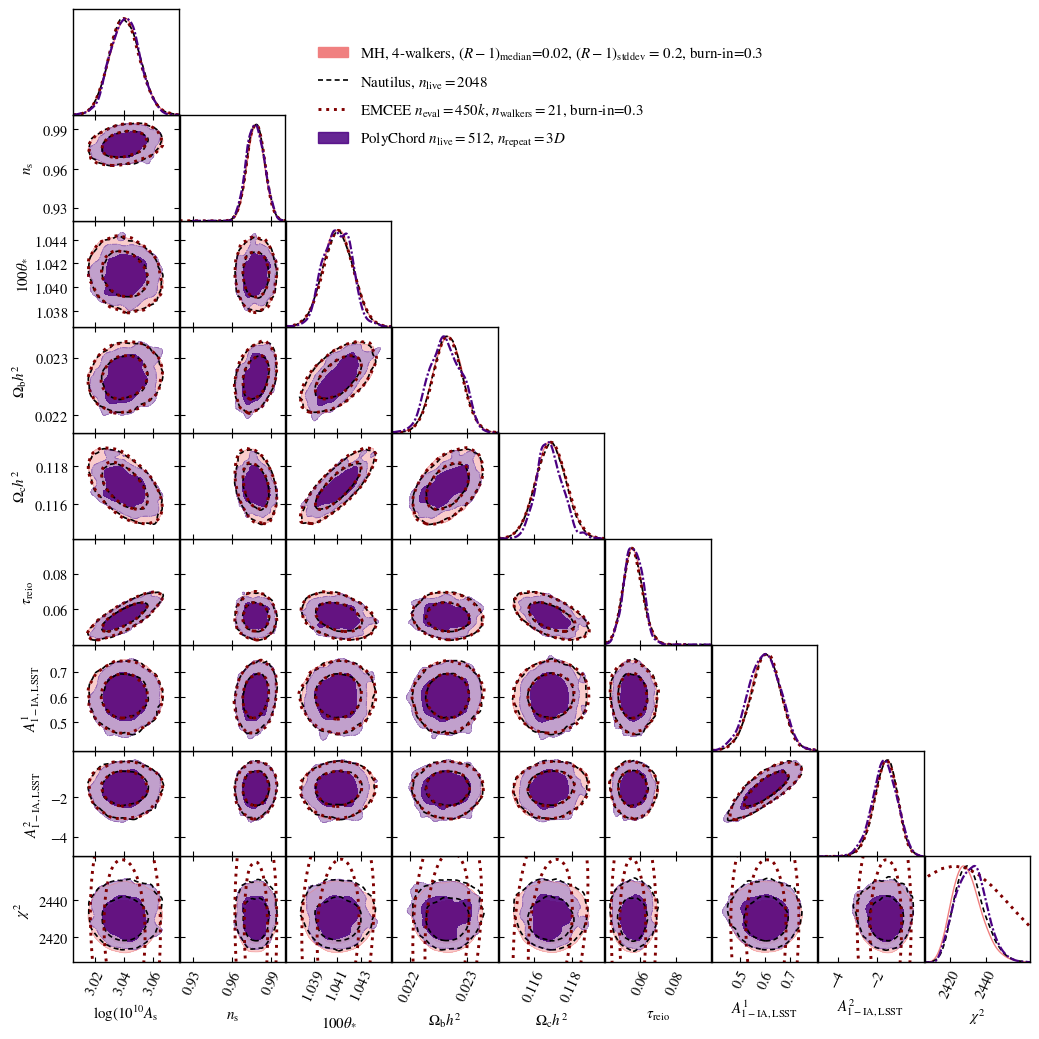

In [ ]:
from IPython.display import Image, display
display(Image(filename="/content/cocoa/Cocoa/projects/lsst_y1/chains/example_compare_chains.png"))